<a href="https://colab.research.google.com/github/vamvieira/Projeto_EstufaIA/blob/main/Projeto_Estufa_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Olá! Sou Vitor Magalhães, estou entrando no mundo da Ciência de Dados e MLops. Me formei em Sistemas de Informação na FIAP, em 2023.

### **Problema:** Muitos agricultores de estufas enfrentam desperdício de tempo e dinheiro ao contatar empresas de agrotóxicos para monitorar o estado das plantas, ocorrendo a demora do atendimento ao local.

### ***Solução:*** Para mitigar esses obstáculos, proponho o desenvolvimento de um modelo de Rede Neural Convolucional (CNN) que analisa as imagens, das plantas enviadas pelos agricultores.  Esse modelo será capaz de diagnosticar se a planta está saudável ou não, oferecendo uma resposta rápida e precisa. Inicialmente, o modelo irá fornecer respostas básicas, mas pretendo aprimorá-lo para identificar com precisão o tipo de doença que a planta está enfrentando e recomendar tratamentos específicos.

### Além do modelo proporcionar economia de tempo e recursos para os agricultores, ele desempenha na redução de possíveis perdas de colheita, por conta de sua capacidade de oferecer um diagnóstico, tratamento rápido e preciso, futuramente.

###  *O modelo criado foi baseado em uma estufa de pepino, utilizei fotos de um projeto do Kaggle [Cucumber Greenhouse Dataset](https://www.kaggle.com/datasets/farahseifeld/greenhouse-cucumber-growth-stages)*

*   [Linkedin](https://www.linkedin.com/in/vitor-magalhaes-vieira/)
*   [Github](https://github.com/vamvieira)

In [ ]:
import os
import shutil
import random

# Diretório principal com as subpastas
data_dir = "/content/Pepino_IA"

# Proporções para treino, validação e teste
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Cria as pastas de destino
os.makedirs("treino", exist_ok=True)
os.makedirs("validacao", exist_ok=True)
os.makedirs("teste", exist_ok=True)

# Cria as subpastas dentro das pastas de destino
for category in os.listdir(data_dir):
    os.makedirs(os.path.join("treino", category), exist_ok=True)
    os.makedirs(os.path.join("validacao", category), exist_ok=True)
    os.makedirs(os.path.join("teste", category), exist_ok=True)

# Itera pelas subpastas de categorias
for category in os.listdir(data_dir):
    category_path = os.path.join(data_dir, category)

    # Lista as imagens na subpasta
    images = os.listdir(category_path)
    random.shuffle(images)

    # Calcula o número de imagens para cada conjunto
    train_count = int(len(images) * train_ratio)
    val_count = int(len(images) * val_ratio)
    test_count = len(images) - train_count - val_count

    # Divide as imagens
    train_images = images[:train_count]
    val_images = images[train_count:train_count + val_count]
    test_images = images[train_count + val_count:]

    # Copia as imagens para as pastas de destino
    for image in train_images:
        src_path = os.path.join(category_path, image)
        dest_path = os.path.join("treino", category, image)
        shutil.copy(src_path, dest_path)

    for image in val_images:
        src_path = os.path.join(category_path, image)
        dest_path = os.path.join("validacao", category, image)
        shutil.copy(src_path, dest_path)

    for image in test_images:
        src_path = os.path.join(category_path, image)
        dest_path = os.path.join("teste", category, image)
        shutil.copy(src_path, dest_path)

print("Divisão dos dados concluída.")

Divisão dos dados concluída.


In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# --- Definir a arquitetura da CNN ---
model = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(5, activation="softmax")
    ]
)

#Carregar os dados e os rótulos
train_images = []
train_labels = []
val_images = []
val_labels = []
test_images = []
test_labels = []

# Definição do tamanho da imagem
img_width, img_height = 150, 150

In [ ]:
#Criar um dicionário para mapear categorias para números inteiros
category_mapping = {
    'Healthy_Leaves': 0,
    'Unhealthy_Leaves': 1
}

for dataset in ["treino", "validacao", "teste"]:
    for category in os.listdir(os.path.join(dataset)):
        category_path = os.path.join(dataset, category)
        for filename in os.listdir(category_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                img_path = os.path.join(category_path, filename)
                img = load_img(img_path, target_size=(img_width, img_height))
                img_array = img_to_array(img)
                if dataset == "treino":
                    train_images.append(img_array)
                    train_labels.append(category_mapping[category])
                elif dataset == "validacao":
                    val_images.append(img_array)
                    val_labels.append(category_mapping[category])
                else:
                    test_images.append(img_array)
                    test_labels.append(category_mapping[category])

In [ ]:
# Converter para arrays NumPy para o treinamento
train_images = np.array(train_images)
val_images = np.array(val_images)
test_images = np.array(test_images)

#Converter os rótulos para one-hot encoding
train_labels = to_categorical(train_labels, num_classes=5)
val_labels = to_categorical(val_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)

In [ ]:
#Compilar o modelo
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Treinar o modelo
model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

from keras.preprocessing.image import ImageDataGenerator

# Crie um gerador de aumento de dados
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Utilize o gerador durante o treinamento
model.fit(datagen.flow(train_images, train_labels, batch_size=32), epochs=10, validation_data=(val_images, val_labels))

#Avaliar o modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Acurácia no conjunto de teste: {test_acc}")

# Salva o modelo
model.save("testep_p1.h5")


Epoch 1/10
3/3 [==============================] - 9s 3s/step - loss: 51.9174 - accuracy: 0.3462 - val_loss: 111.3825 - val_accuracy: 0.6111
Epoch 2/10
3/3 [==============================] - 4s 1s/step - loss: 76.1322 - accuracy: 0.5256 - val_loss: 36.6923 - val_accuracy: 0.3889
Epoch 3/10
3/3 [==============================] - 4s 1s/step - loss: 19.0626 - accuracy: 0.5000 - val_loss: 7.0997 - val_accuracy: 0.6111
Epoch 4/10
3/3 [==============================] - 4s 1s/step - loss: 5.7904 - accuracy: 0.6026 - val_loss: 9.0508 - val_accuracy: 0.3889
Epoch 5/10
3/3 [==============================] - 6s 2s/step - loss: 4.5741 - accuracy: 0.6154 - val_loss: 2.0705 - val_accuracy: 0.6944
Epoch 6/10
3/3 [==============================] - 4s 1s/step - loss: 1.7868 - accuracy: 0.7564 - val_loss: 0.5868 - val_accuracy: 0.8333
Epoch 7/10
3/3 [==============================] - 11s 4s/step - loss: 0.5662 - accuracy: 0.7949 - val_loss: 0.3424 - val_accuracy: 0.8889
Epoch 8/10
3/3 [==================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Carrega a nova imagem
image_path = 'teste_1.jpg'
img = load_img(image_path, target_size=(img_width, img_height))

# Converte a imagem para um array NumPy
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Faz a previsão usando o modelo treinado
prediction = model.predict(img_array)

# Obtém o índice da classe com maior probabilidade
predicted_class_index = np.argmax(prediction)

# Obtém o nome da classe prevista
predicted_class = list(category_mapping.keys())[predicted_class_index]

# Imprime a classe prevista
print(f"Classe prevista: {predicted_class}")

1/1 [==============================] - 0s 55ms/step
Classe prevista: Healthy_Leaves


# Verifiquei que algumas imagens não subiram ao testar o modelo, mas ao retestar funcionou, o modelo está prevendo se a planta está saudavel ou não

2/2 [==============================] - 1s 150ms/step


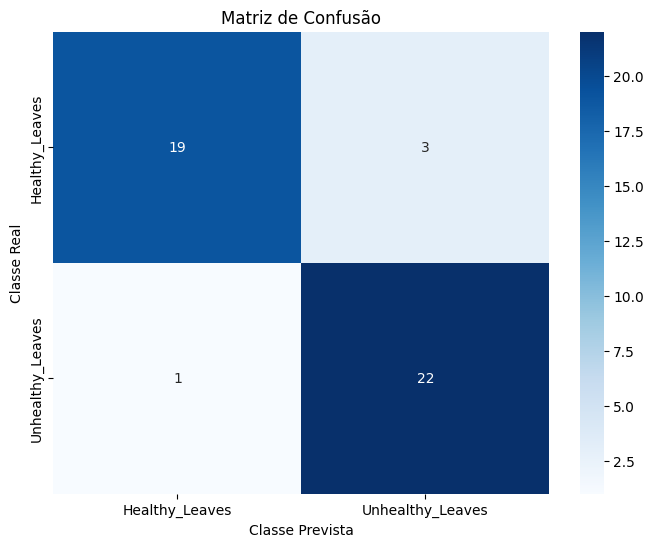

In [ ]:
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Diretório principal com as subpastas
data_dir = "Pepino_IA"

#Parâmetros do modelo
img_width, img_height = 150, 150
category_mapping = {
    'Healthy_Leaves': 0,
    'Unhealthy_Leaves': 1
}

#Carregar o modelo
model = keras.models.load_model("testep_p1.h5")

#Carregar os dados de teste
test_images = []
test_labels = []

for category in os.listdir(os.path.join("teste")):
    category_path = os.path.join("teste", category)
    for filename in os.listdir(category_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(category_path, filename)
            img = load_img(img_path, target_size=(img_width, img_height))
            img_array = img_to_array(img)
            test_images.append(img_array)
            test_labels.append(category_mapping[category])

test_images = np.array(test_images)
test_labels = to_categorical(test_labels, num_classes=5)

#Faz as previsões
predictions = model.predict(test_images)

#Converte as previsões para classes
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

#Cria a matriz de confusão
cm = confusion_matrix(true_classes, predicted_classes)

#Plota a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=category_mapping.keys(), yticklabels=category_mapping.keys())
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.title("Matriz de Confusão")
plt.show()

Treino anterior sem criar um gerador de aumento de dados e com outras informações irrelevantes ao projeto.

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

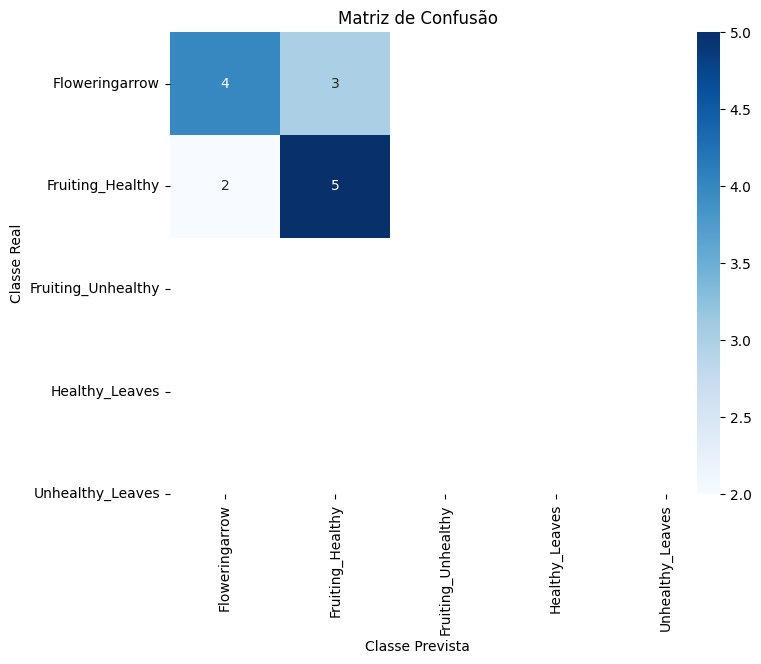

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

#(carregar o modelo e os dados de teste)

#Modelo
model = keras.models.load_model("testep_p1.h5")

#Dados de teste
test_images = []
test_labels = []

for category in os.listdir(os.path.join("teste")):
    category_path = os.path.join("teste", category)
    for filename in os.listdir(category_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(category_path, filename)
            img = load_img(img_path, target_size=(img_width, img_height))
            img_array = img_to_array(img)
            test_images.append(img_array)
            test_labels.append(category_mapping[category])

test_images = np.array(test_images)
test_labels = to_categorical(test_labels, num_classes=5)

# Faz as previsões
predictions = model.predict(test_images)

# Converte as previsões para classes
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Calcula as métricas
precision = precision_score(true_classes, predicted_classes, average=None)
recall = recall_score(true_classes, predicted_classes, average=None)
f1 = f1_score(true_classes, predicted_classes, average=None)

# Imprime as métricas para cada classe
for i, category in enumerate(category_mapping.keys()):
    print(f"Classe: {category}")
    print(f"  Precisão: {precision[i]:.2f}")
    print(f"  Revocação: {recall[i]:.2f}")
    print(f"  F1-score: {f1[i]:.2f}")

2/2 [==============================] - 1s 304ms/step
Classe: Healthy_Leaves
  Precisão: 0.95
  Revocação: 0.86
  F1-score: 0.90
Classe: Unhealthy_Leaves
  Precisão: 0.88
  Revocação: 0.96
  F1-score: 0.92


In [ ]:
import os

# Diretório principal com as subpastas
data_dir = "Pepino_IA"

# Conta o número de imagens em cada categoria
for category in os.listdir(data_dir):
    category_path = os.path.join(data_dir, category)
    image_count = len(os.listdir(category_path))
    print(f"Categoria: {category}, Imagens: {image_count}")

Categoria: .ipynb_checkpoints, Imagens: 0
Categoria: Healthy_Leaves, Imagens: 41
Categoria: Unhealthy_Leaves, Imagens: 52


# Integração do modelo com o LLM, respondendo se está saudavel ou não, devido ao pouco tempo não consegui ajustar da forma que gostaria, mas sigo empenhado em continuar desenvolvendo o projeto.

## *Utilizei langchain, mas o modelo da erro ao utilizar em português.*

In [ ]:
from langchain.llms import GooglePalm
from langchain.prompts import PromptTemplate
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

# Substitua 'YOUR_GOOGLE_API_KEY' pela sua chave de API do Google
llm = GooglePalm(google_api_key='SUA_KEY', temperature=0)

template = """Você é um analisador de folhas de pepino. Sua função é identificar se a planta está saudável ou não suadável, Você deve:
    - Perguntar se a planta está com algumas pigmentações amarelas
    - Perguntar quantos meses a planta começou a frutificar
    - perguntar se as extremidades da planta estão com aparência de queimada
    - Baseado nas respostas, dar um diagnóstico, que pode ser:
        - "Sua planta parece saudável!"
        - "Sua planta pode estar com problemas, recomendo observar mais alguns dias."
        - "Sua planta parece doente, recomendo chamar um especialista."
Está é a conversa até o momento:
{history}
Human: {input}
AI Assistant:"""

PROMPT = PromptTemplate(input_variables=["history", "input"], template=template)

conversation = ConversationChain(
    prompt=PROMPT,
    llm=llm,
    memory=ConversationBufferMemory(ai_prefix="AI Assistant"),
    callbacks=[StreamingStdOutCallbackHandler()]
)

print("Início da conversa com o Analisador de Folhas de Pepino:")
while True:
    user_input = input("Você: ")
    if user_input.lower() == "sair":
        break
    response = conversation.predict(input=user_input)
    print(response)

# Tentei criar usando o exemplo da Imersão Alura + Google

In [ ]:
!pip install -q -U google-generativeai

In [ ]:
!pip install langchain -q -U
!pip install --upgrade langchain -q -U
!pip install google-cloud-vision -q -U

In [ ]:
import google.generativeai as genai
from google.ai.generativelanguage import GenerationConfig, SafetySetting

GOOGLE_API_KEY="SUA_KEY"
genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


In [ ]:
safety_settings={
    'HATE': 'BLOCK_NONE',
    'HARASSMENT': 'BLOCK_NONE',
    'SEXUAL' : 'BLOCK_NONE',
    'DANGEROUS' : 'BLOCK_NONE'
    }

In [ ]:
generation_config = GenerationConfig(
    temperature=0.7,
    top_k=40,
    top_p=0.95
)

In [ ]:
model = genai.GenerativeModel(model_name='gemini-pro',
                                  generation_config=generation_config,
                                  safety_settings=safety_settings,)

In [ ]:
def classify_image_with_cloud_vision(image_bytes):
    client = vision.ImageAnnotatorClient()
    image = vision.Image(content=image_bytes)
    response = client.label_detection(image=image)
    labels = response.label_annotations
    if labels:
        return labels[0].description
    else:
        return "Não foi possível classificar a imagem."

In [ ]:
# Função para interagir com o usuário e obter informações
def conversar_com_usuario():
    print("Olá! Sou o EstufaIA, que pode te ajudar a analisar a saúde da sua planta.")
    print("Por favor, descreva qual é a sua planta e características dela:")
    descricao_planta = input()

    safety_settings=safety_settings(
    model=model,
    generation_config=generation_config,
)

    # Utilize a API Gemini para gerar uma resposta
    prompt = f"O usuário descreveu a planta como: {descricao_planta}. Peça gentilmente ao usuário para enviar uma foto da planta para uma análise mais precisa."
    response = model.generate_text(prompt=prompt)
    print(response.text)

    # Obtenha a imagem do usuário (implemente a lógica para receber a imagem)
    image_url = input("Cole o link da imagem da sua planta:")
    image_data = requests.get(image_url).content

    # Classifique a imagem
    classificacao = classify_image_with_cloud_vision(image_data)

    # Gere uma resposta final usando a API Gemini
    prompt = f"A classificação da imagem da planta é: {classificacao}.  Com base na descrição inicial '{descricao_planta}' e na classificação da imagem, forneça uma análise completa da saúde da planta e sugestões."
    response = model.generate_text(prompt=prompt)
    print(response.text)

In [ ]:
# Inicie a conversa
conversar_com_usuario()

# Tentei uma versão alternativa direto do Google Drive, mas não está concluido.
## *Possivel mudança futura...*

In [ ]:
#Versão para o Google Drive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import os
import shutil
import random

# --- Autenticação no Google Drive ---

gauth = GoogleAuth()
# Autenticação via navegador
gauth.LocalWebserverAuth()
drive = GoogleDrive(gauth)

# ID da pasta "Pepino_IA" no Google Drive
folder_id = 'Pepino_IA'

# --- Baixar os arquivos da pasta para o diretório local ---

file_list = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()
for file in file_list:
    file.GetContentFile(file['title'])

# Criar a pasta "Pepino_IA" localmente, se não existir
local_data_dir = "Pepino_IA"
os.makedirs(local_data_dir, exist_ok=True)

# Mover os arquivos baixados para a pasta "Pepino_IA"
for file in file_list:
    shutil.move(file['title'], os.path.join(local_data_dir, file['title']))

# --- Divisão das imagens ---

# Diretório principal com as subpastas (agora local)
data_dir = local_data_dir

# Proporções para treino, validação e teste
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Cria as pastas de destino
os.makedirs("treino", exist_ok=True)
os.makedirs("validacao", exist_ok=True)
os.makedirs("teste", exist_ok=True)

# Itera pelas subpastas de categorias
for category in os.listdir(data_dir):
    category_path = os.path.join(data_dir, category)

    # Lista as imagens na subpasta
    images = os.listdir(category_path)
    random.shuffle(images)  # Embaralha as imagens

    # Calcula o número de imagens para cada conjunto
    train_count = int(len(images) * train_ratio)
    val_count = int(len(images) * val_ratio)
    test_count = len(images) - train_count - val_count

    # Divide as imagens
    train_images = images[:train_count]
    val_images = images[train_count:train_count + val_count]
    test_images = images[train_count + val_count:]

    # Copia as imagens para as pastas de destino
    for image in train_images:
        src_path = os.path.join(category_path, image)
        dest_path = os.path.join("treino", category, image)
        shutil.copy(src_path, dest_path)

    for image in val_images:
        src_path = os.path.join(category_path, image)
        dest_path = os.path.join("validacao", category, image)
        shutil.copy(src_path, dest_path)

    for image in test_images:
        src_path = os.path.join(category_path, image)
        dest_path = os.path.join("teste", category, image)
        shutil.copy(src_path, dest_path)

print("Divisão dos dados concluída.")

In [ ]:
!pip install google-cloud-vision

In [ ]:
import requests
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from google.cloud import vision
import io

def classify_image_with_cloud_vision(image_path):
    client = vision.ImageAnnotatorClient()

    with io.open(image_path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.label_detection(image=image)
    labels = response.label_annotations

    if labels:
        return labels[0].description  # Retorna a descrição do rótulo mais provável
    else:
        return "Erro ao classificar a imagem"

# Carrega a nova imagem
image_path = '/content/teste3.jpg'  # Substitua pelo caminho da sua imagem
img_width, img_height = 224, 224
img = load_img(image_path, target_size=(img_width, img_height))

# Converte a imagem para um array NumPy
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Faz a previsão usando o modelo treinado
prediction = model.predict(img_array)  # Certifique-se de que "model" esteja definido

# Obtém o índice da classe com maior probabilidade
predicted_class_index = np.argmax(prediction)

# Obtém o nome da classe prevista (certifique-se de que "category_mapping" esteja definido)
predicted_class = list(category_mapping.keys())[predicted_class_index]

# Determina se a planta é saudável ou não com base na classe prevista
if predicted_class == 'Healthy':
    print("A planta é saudável.")
else:
    print("A planta não é saudável.")

# Utiliza o Google Cloud Vision para obter uma segunda opinião
cloud_vision_classification = classify_image_with_cloud_vision(image_path)
print("Classificação do Cloud Vision:", cloud_vision_classification)

TESTE

In [ ]:
import requests
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def classify_image_with_gemini(image_path):
  gemini_api_endpoint = "https://gemini.googleapis.com/v1/classify"
  api_key = "SUA_KEY"

    # Carrega a imagem e converte para bytes
  with open(image_path, "rb") as file:
        image_bytes = file.read()

    # Envia a imagem para a API Gemini
  response = requests.post(
        gemini_api_endpoint,
        files={"file": image_bytes},
        headers={"Authorization": "Bearer {}".format(api_key)}
    )

  if response.status_code == 200:
      result = response.json()
      return result.get("prediction", "Erro ao classificar a imagem")
  else:
      return "Erro ao classificar a imagem"

# Carrega a nova imagem
image_path = '/content/teste3.jpg'
img_width, img_height = 224, 224
img = load_img(image_path, target_size=(img_width, img_height))

# Converte a imagem para um array NumPy
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Faz a previsão usando o modelo treinado
prediction = model.predict(img_array)

# Obtém o índice da classe com maior probabilidade
predicted_class_index = np.argmax(prediction)

# Obtém o nome da classe prevista
predicted_class = list(category_mapping.keys())[predicted_class_index]

# Determina se a planta é saudável ou não com base na classe prevista
if predicted_class == 'Healthy':
    print("A planta é saudável.")
else:
    print("A planta não é saudável.")

# Utiliza o Google Gemini para obter uma segunda opinião
gemini_classification = classify_image_with_gemini(image_path)
print("Classificação do Gemini:", gemini_classification)